In [1]:
# 初期設定
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def kf_predict(x, P, u, A, Bu, B, Q):
    if u is None:
        x_new = A @ x
    else:
        x_new = A @ x + Bu @ u
    P_new = A @ P @ A.T + B @ Q @ B.T
    return x_new, P_new

In [3]:
def kf_update(x, P, y, C, R):
    S = R + C @ P @ C.T
    K = scipy.linalg.solve(S.T, C @ P, assume_a="pos").T
    # K = P@C.T@scipy.linalg.inv(S)
    x_new = x + K @ (y - C @ x)
    P_new = P - K @ C @ P
    return x_new, P_new, K

In [4]:
A = np.eye(2)
B = np.eye(2)
Bu = None
C = np.zeros((1, 2))
# Q = np.diag([1e-4, 1e-6])
Q = np.diag([1e-2, 1e-3])
R = np.array([[1]])

N = 1000

u = np.random.normal(0, 1.0, N)
w = np.random.normal(0, 1.0, N)

xhat = np.zeros(2)
P = np.eye(2) * 10.0

X = []
Xhat = []
Y = []
U = []

a = 0.9
b = 2

y = np.array([0])

In [5]:
# システムのシミュレーションと推定
for k in range(N):
    xhat, P, K = kf_update(xhat, P, y, C, R)
    X.append([a, b])
    Y.append(y)
    Xhat.append(xhat)
    C[:, 0] = y
    C[:, 1] = u[k]
    y = a * y + b * u[k] + w[k]
    xhat, P = kf_predict(xhat, P, None, A, None, B, Q)
    if k == N / 2:
        a = 0.5

In [6]:
Xhat_np = np.array(Xhat)
X_np = np.array(X)

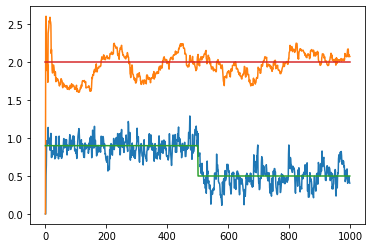

In [7]:
fig1 = plt.figure()
plt.plot(Xhat_np)
plt.plot(X_np)

In [8]:
plt.show()